**感知机（Perceptron）**

**二分类模型、线性分类模型、判别模型**

- 输入：为实例的特征向量

- 输出：实例的类别，取+1和-1

- 模型：寻找能够将训练数据进行线性划分的分离超平面

 - 感知机模型：$f(x) = sign(w*x + b)$  （w权值、b偏置为感知机模型参数，w*x表示内积，sign为符号函数）

   几何解释：w是超平面的法向量，b为超平面的截距

- 策略：建立误分类的损失函数，误分类点到超平面的总距离，损失函数是连续可导函数

 - 损失函数：$\underset{w,b}{min}L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

- 算法：利用随即梯度下降法 Stochastic Gradient Descent，对损失函数进行极小化求解，求得感知机模型

 - 首先，任意选取一个超平面$w_{0}$、$b_{0}$，然后用梯度下降法不断极小化目标函数，极小化过程不是一次使M中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降。
 
   梯度：
 
   $\triangledown _{w}L(w,b)=-\sum y_{i}x_{i}$

   $\triangledown _{b}L(w,b)=-\sum y_{i}$
 
 - 随机抽取一个误分类点使其梯度下降，不断更新w、b：

   $w = w + \eta y_{i}x_{i}$
   
   $b = b + \eta y_{i}$
   
   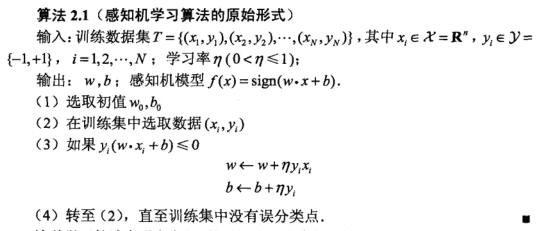
   
   当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

- 形式：原始形式和对偶形式

- 当训练数据集线性可分时，感知机学习算法是收敛的，感知机算法在训练数据集上的误分类次数k满足不等式：

  $k\leqslant \left ( \frac{R}{\gamma } \right )^{2}$
  
拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [56]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [58]:
# 行列数据标注
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()
df.head(5)

2    50
1    50
0    50
Name: label, dtype: int64

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5,0,'sepal length')

Text(0,0.5,'sepal width')

<function matplotlib.pyplot.legend>

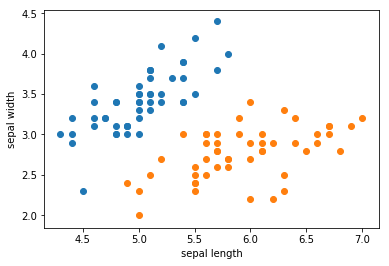

In [59]:
# 数据可视化展示
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend

In [60]:
# 选取特征和标签
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y]) # 将label中的0标签替换为-1

**Perceptron**

In [61]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    # 类创建对象时自动执行，进行初始化操作
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)  # 初始化权重
        self.b = 0  # 初始化截距项
        self.l_rate = 0.1  # 学习步长
        # self.data = data

    # 定义符号函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X) # 更新权重
                    self.b = self.b + self.l_rate * y # 更新步长
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

'Perceptron Model!'

Text(0.5,0,'sepal length')

Text(0,0.5,'sepal width')

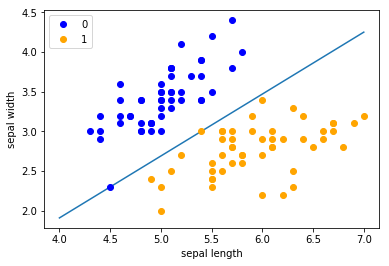

In [62]:
perceptron = Model()  # 类的实例化，创建一个对象
perceptron.fit(X, y)  # 调用类的fit方法

# 可视化超平面
x_points = np.linspace(4, 7, 10)  # linspace返回固定间隔的数据
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 误差分类点到超平面的距离
plt.plot(x_points, y_)

# 可视化展示
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**scikit-learn Perceptron**

In [63]:
from sklearn.linear_model import Perceptron

In [64]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

# 每个特征的权重
print(clf.coef_)
# 截距 决策函数中常量
print(clf.intercept_)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

[[  74.6 -127.2]]
[0.]


Text(0.5,0,'sepal length')

Text(0,0.5,'sepal width')

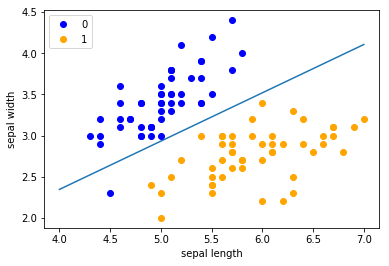

In [65]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()